   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000   

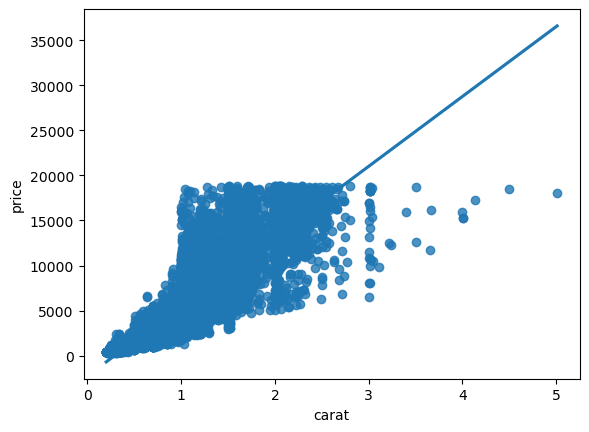

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

             size  
0       38.202030  

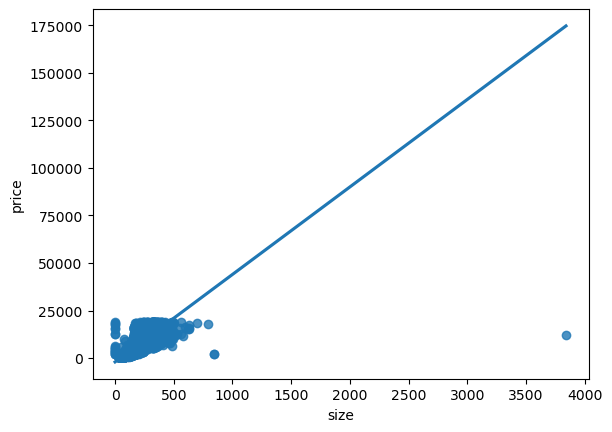

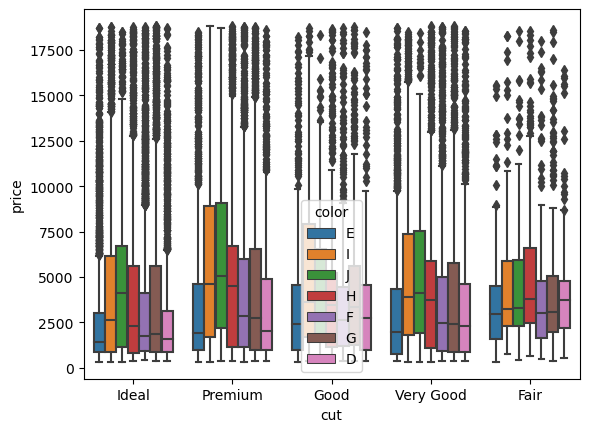

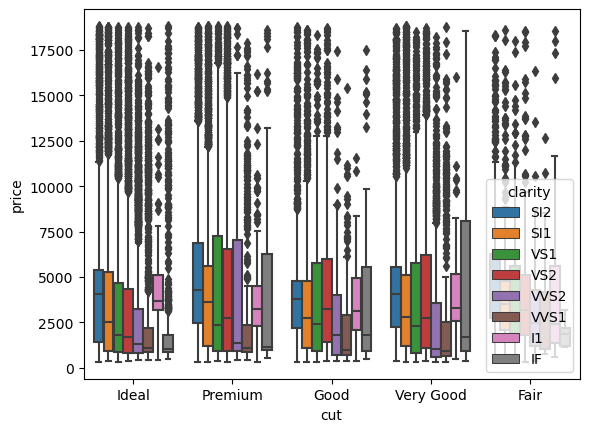

C:\Users\OGHENE-OVO\AppData\Local\Temp\ipykernel_10660\4090525560.py:69: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Diamond Price Prediction
Carat Size: 24
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 3
Size: 50
Predicted Diamond's Price =  [17506.055]


In [7]:
#https://thecleverprogrammer.com/2022/09/26/diamond-price-analysis-using-python/
#https://www.kaggle.com/datasets/shivam2503/diamonds
#Diamond Price Analysis and prediction using Python

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#importing and reading dataset
data = pd.read_csv("diamonds.csv")
print(data.head())
print(data.describe())
print(data.info())
print(data.isnull().sum())
correlation = data.corr()
print(correlation)
print(correlation["price"].sort_values(ascending=False))
data = data.drop("Unnamed: 0",axis=1)

#visualization
sns.regplot(x="carat", 
            y="price", 
            ci=None, 
            data = data)
plt.show()

#basic calc
data["size"] = data["x"] * data["y"] * data["z"]
print(data)

sns.regplot( x="size",
            y="price", 
            ci=None, 
            data=data)
plt.show()

sns.boxplot(x='cut', 
            y='price', 
            hue='color', 
            data=data)
plt.show()

sns.boxplot(x='cut', 
            y='price', 
            hue='clarity', 
            data=data)
plt.show()

#mapping
data["cut"] = data["cut"].map({"Ideal": 1, 
                               "Premium": 2, 
                               "Good": 3,
                               "Very Good": 4,
                               "Fair": 5})

#selecting and splitting dataset
X = np.array(data[["carat", "cut", "size"]])
y = np.array(data[["price"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.10, 
                                                random_state=42)

#model creation
model = RandomForestRegressor()
model.fit(X_train, y_train)

#making predictions 
print("Diamond Price Prediction")
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size: "))
features = np.array([[a, b, c]])
print("Predicted Diamond's Price = ", model.predict(features))